# Центральная предельная теорема своими руками (Python 3.5)

## Распределение Парето

подробнее в [википедии](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE), [документация по объекту](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.pareto.html)

In [101]:
# импортируем нужные модули
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline
import math

In [102]:
b = 2.62 # Такое значение параметра взято из документации scipy чтобы не думать лишний раз
samples = ss.pareto.rvs(b, size=1000) # Генерируем выборку

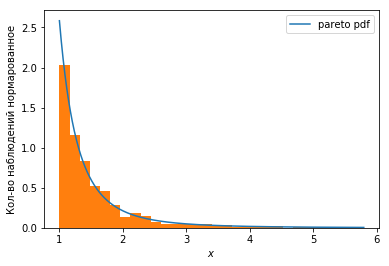

In [103]:
# определяем интервал x
x_min = ss.pareto.ppf(0.01, b)
x_max = ss.pareto.ppf(0.99, b)
x = np.linspace(x_min, x_max, 1000)

# считаем значения функции плотности вероятности для х
pdf = ss.pareto.pdf(x, b)

# рисуем картинку
plt.plot(x, pdf, label='pareto pdf')
plt.hist(samples, bins=30, range=(x_min,x_max), normed=True)
plt.ylabel('Кол-во наблюдений нормарованное')
plt.xlabel('$x$')
plt.legend(loc='best')ч
plt.show()

### Среднее и дисперсия соглаcно [википедии](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)

In [104]:
E = (x_min*b)/(b-1) # среднее
D = (E**2)*(b/(b-2)) # дисперсия
print(E)
print(D)

1.62349977599
11.1381757892


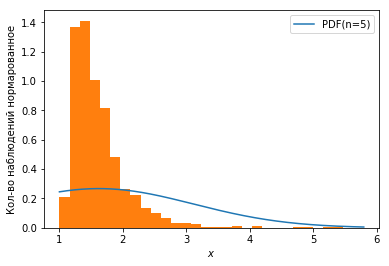

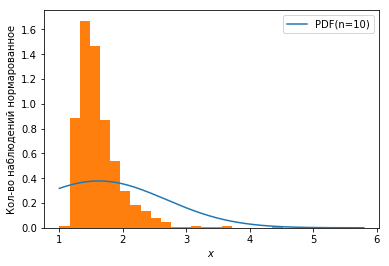

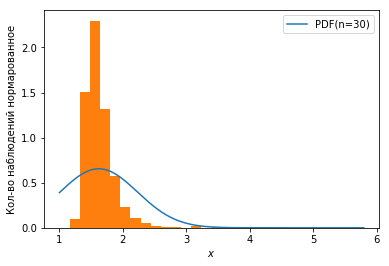

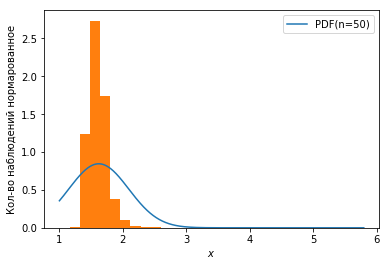

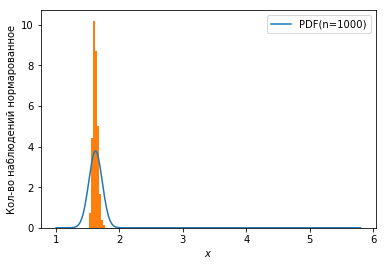

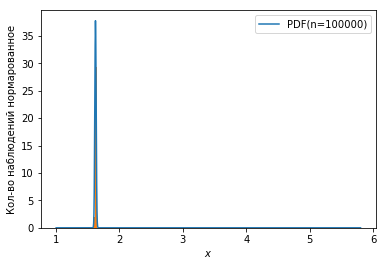

In [109]:
ns = ( 5, 10, 30, 50, 1000, 100000) # Количества выборок для которых будем выполнять задание
for n in ns:    
    samples_avg=np.array([]) # будующий массив выборочных средних
    for i in range(1,1001): # генерируем тысячу выборок
        samples_i = ss.pareto.rvs(b, size=n)
        mean_avg=sum(samples_i)/n # выборочная средняя
        samples_avg=np.append(samples_avg,mean_avg)
        
    # Значения параметров нормальных распределений, которыми, согласно центральной предельной теореме,
    # приближается распределение выборочных средних.
   
    Dn = D/n # дисперсия
    standard_deviation = math.sqrt(Dn) # стандартное отклонение
    
    norm = ss.norm(E, standard_deviation) # нормальное распределение
    pdf = norm.pdf(x) # плотность нормального распределения
    
    # Для улучшения наглядности меняем количество интервалов для большого количества выборок
    bins=30
    if n>=1000:
        bins=150
    
    #рисуем картинки
    plt.plot(x, pdf, label='PDF(n='+str(n)+')')
    plt.hist(samples_avg, bins =bins, range=(x_min,x_max), normed=True)
    plt.ylabel('Кол-во наблюдений нормарованное')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    plt.show()

при росте n точность апроксимации растет, а при очень больших значениях n пропадает специфика распределения Парето, о чем и говорит ЦПТ